With the Data as wrangled as it's likely going to get, it's time to start EDA! 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('7_final_books.csv')

In [3]:
df.head()

,Unnamed: 0,title,author,total words,vividness,passive voice,all adverbs,ly-adverbs,non-ly-adverbs,genre,year
0,0,The Vanished Birds,Simon Jimenez,124205.0,55.18,6.37,1.95,0.36,1.58,"['Science Fiction', 'Fiction', 'Fantasy', 'Que...",2020.0
1,1,The Price of Honor,Jonathan P. Brazee,77253.0,35.35,8.71,2.63,0.71,1.92,['Science Fiction'],2017.0
2,2,The Case of the Baker Street Irregulars,Anthony Boucher,80557.0,32.33,8.41,3.72,1.64,2.08,"['Mystery', 'Fiction', 'Crime', 'Humor', 'Clas...",1940.0
3,3,Wildoak,C. C. Harrington,55602.0,74.34,6.92,3.04,1.16,1.87,"['Middle Grade', 'Historical Fiction', 'Fictio...",2022.0
4,4,The Holiday,T. M. Logan,101767.0,50.30,8.02,3.06,1.12,1.93,"['Thriller', 'Mystery', 'Fiction', 'Mystery Th...",2019.0


In [4]:
df = df.drop('Unnamed: 0', axis=1)

Let's drop the rows missing our target feature, genres. 

In [5]:
to_drop = df['genre'] == '[]'

In [6]:
print(f"Of the {len(df)} books in the dataframe, {np.sum(to_drop)} are missing genre data and must be dropped.")

Of the 22449 books in the dataframe, 427 are missing genre data and must be dropped.


In [7]:
df = (df[~to_drop])

My first question was how correlated the linguistic data might be. 

In [8]:
linguistic_data = df.loc[:,'vividness':'non-ly-adverbs']

In [9]:
corr = linguistic_data.corr()

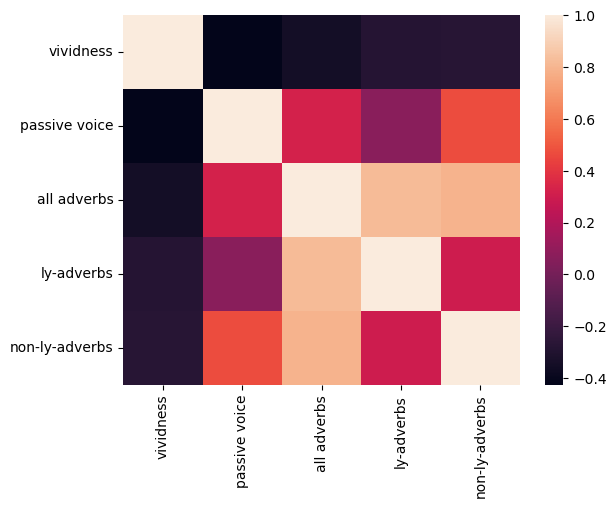

In [10]:
sns.heatmap(corr);

Unsurprisingly, it looks as if "all adverbs" is highly correlated with "ly-adverbs" and "non-ly-adverbs." This makes sense, since it's just the sum of those two columns. This feature seems redundant and can likely be dropped. 

Vividness seems moderately negatively correlated with every other feature. The correlation might not be strong enough to drop at the beginning, but we'll keep it in mind. 

Passive voice seems moderately correlated with non-ly-adverbs. Interesting! 

Out of interest, let's see what happens when we include the other quantitative variables.

In [11]:
quantitative_data = df.drop(['title','author','genre'],axis=1)

In [12]:
corr = quantitative_data.corr()

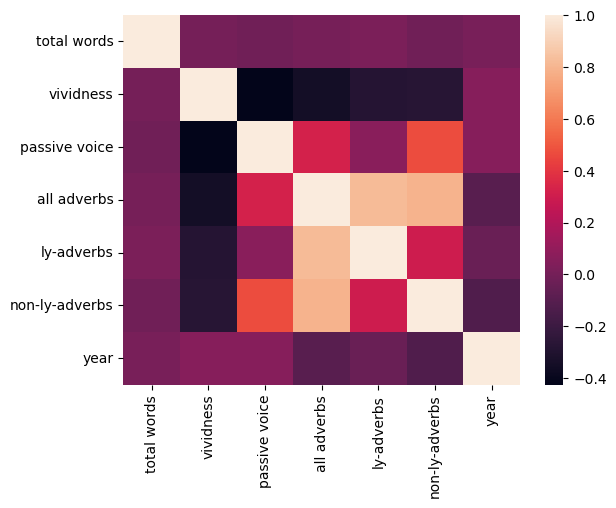

In [13]:
sns.heatmap(corr);

It appears that neight the wordcount nor the year are particularly correlated to any other data. There's perhaps a very small negative correlation between adverbs--particularly non-ly-adverbs, and year. Perhaps these went out of fashion as time went on. But the correlation is likely too small to be significant, and it doesn't seem worth running a test to find out. 

Let's look at the numerical correlations.

In [14]:
corr.style.background_gradient()

,total words,vividness,passive voice,all adverbs,ly-adverbs,non-ly-adverbs,year
total words,1.000000,-0.001394,-0.018643,0.004145,0.023499,-0.017973,0.011426
vividness,-0.001394,1.000000,-0.425165,-0.348603,-0.282485,-0.279284,0.058717
passive voice,-0.018643,-0.425165,1.000000,0.323722,0.064872,0.468020,0.056973
all adverbs,0.004145,-0.348603,0.323722,1.000000,0.817468,0.793055,-0.099414
ly-adverbs,0.023499,-0.282485,0.064872,0.817468,1.000000,0.297553,-0.036549
non-ly-adverbs,-0.017973,-0.279284,0.468020,0.793055,0.297553,1.000000,-0.126100
year,0.011426,0.058717,0.056973,-0.099414,-0.036549,-0.126100,1.000000


As Github will not display CSS styling, here is an image of how it should look. 

![correlation gradient](correlation_heatmap.png)

As we saw from the heatmap, the only correlations that look particularly noteworthy are between the different types of adverbs, and perhaps between non-ly-adverbs and passive voice. 

Next, let's make a few histograms of the quantitative data.

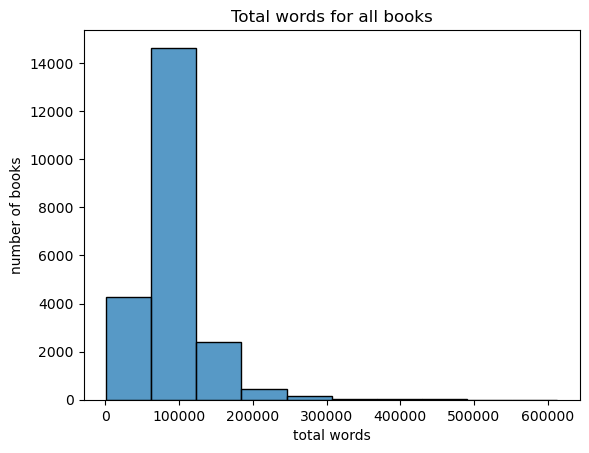

In [15]:
sns.histplot(df['total words'],bins=10)
plt.xlabel('total words')
plt.ylabel('number of books')
plt.title('Total words for all books')
plt.show();

It looks like this has a fairly heavy right skew, but some of the larger wordcounts are hard to see. Let's see if adding more bins improves the situation. 

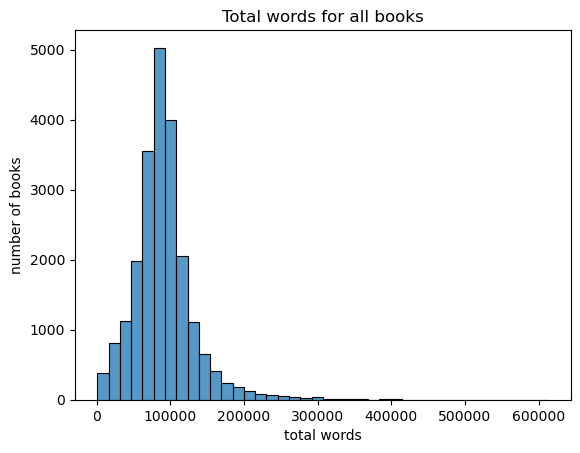

In [16]:
sns.histplot(df['total words'],bins=40)
plt.xlabel('total words')
plt.ylabel('number of books')
plt.title('Total words for all books')
plt.show();

Now that the tallest bin is much shorter, you can see perhaps a bit more of the tail. Definitely a strong right skew, with a center a bit under 100,000 words.

In [17]:
df['total words'].describe()

count     22022.000000
mean      91125.459404
std       43522.003334
min         984.000000
25%       68462.250000
50%       87167.500000
75%      106140.250000
max      612956.000000
Name: total words, dtype: float64

The summary confirms our analysis.

Since we're going to have to make a few different histograms, let's make a function.

In [18]:
def histogram(df, column, bins=20):
    sns.histplot(df[column],bins=bins)
    plt.xlabel(column)
    plt.ylabel("number of books")
    plt.title(f"{column.capitalize()} for all books")
    plt.show();

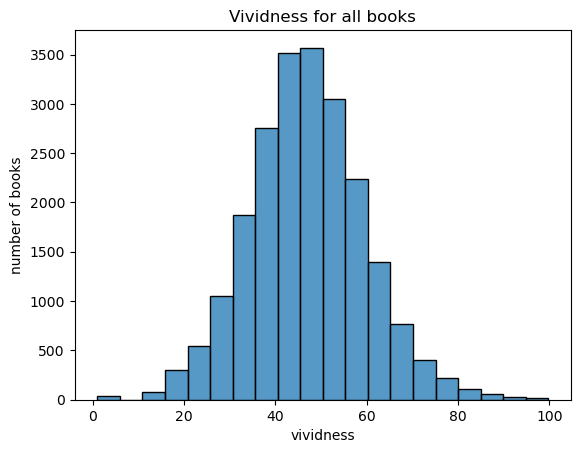

In [19]:
histogram(df, 'vividness')

Interestingly, vividness appears to be largely symmetrical, with a center around 50%. 

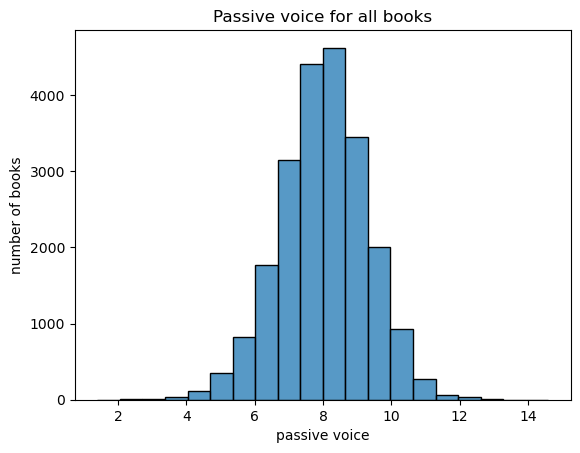

In [20]:
histogram(df, 'passive voice')

Passive voice also seems quite symmetrical, with a center around a score of 8.

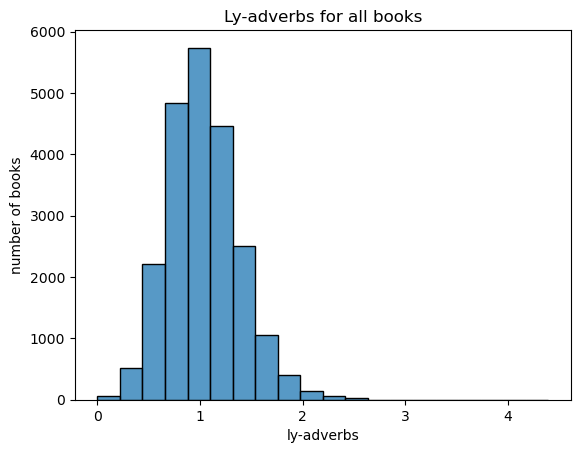

In [21]:
histogram(df, 'ly-adverbs')

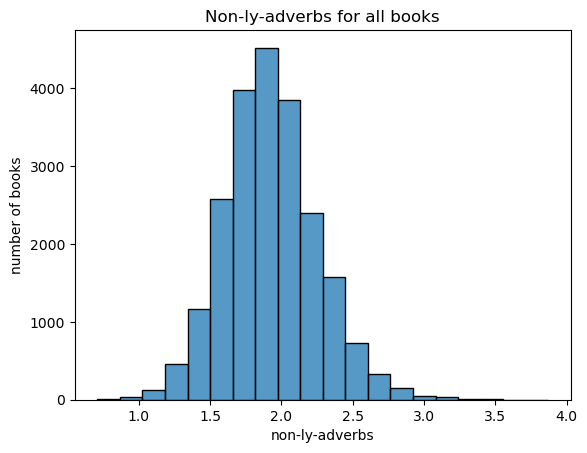

In [22]:
histogram(df, 'non-ly-adverbs')

ly- and non-ly- adverbs appear to have symmetrical distributions as well, with non-ly having a slightly greater center and spread.

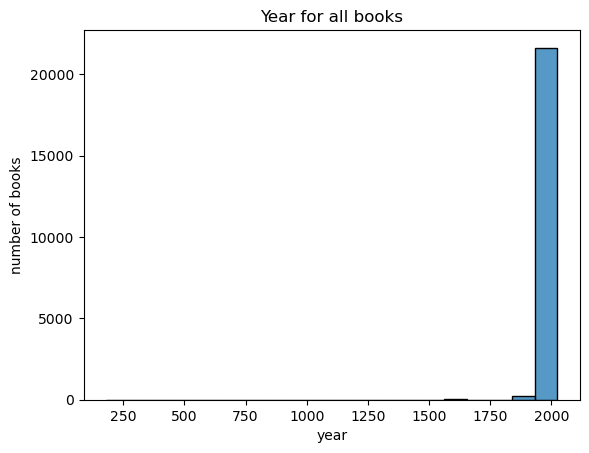

In [23]:
histogram(df,'year')

The years of books in the dataframe seems to have a very significant left skew, with very few very old books, and the rest clustered around 2000, with further details difficult to make out. This might be worth repeating with outliers removed.

In [24]:
df['year'].describe()

count    21930.000000
mean      2010.430415
std         36.979651
min        180.000000
25%       2013.000000
50%       2018.000000
75%       2020.000000
max       2023.000000
Name: year, dtype: float64

The IQR appears to be 7 years, so strictly speaking, any book from before 2003 or so is an outlier. However, I don't think it's necessary to restrict ourselves by quite that much. Let's try viewing only books from the 20th century or later.

In [25]:
recent_books = df[df['year'] > 1900]

In [26]:
print(f"This still leaves {len(recent_books)} books, or {round(len(recent_books)/len(df) * 100,1)}% of our data.")

This still leaves 21767 books, or 98.8% of our data.


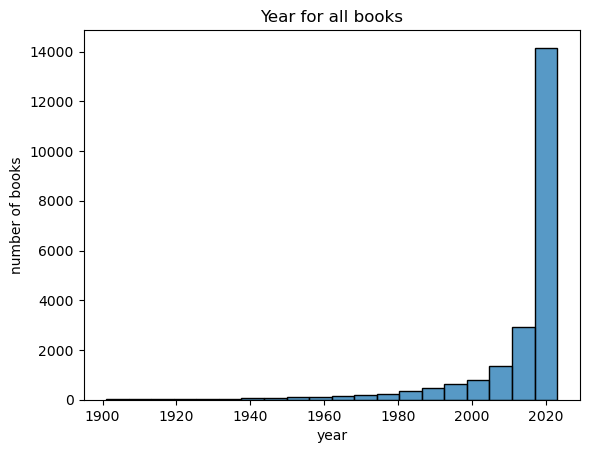

In [27]:
histogram(recent_books, 'year')

This is close enough to all the books, and we can still see a heavy right skew. Most of our books can now be seen clustered around the current year at the time of running this analysis--2023.

In [28]:
recent_books['year'].describe()

count    21767.000000
mean      2012.438002
std         15.463577
min       1901.000000
25%       2013.000000
50%       2018.000000
75%       2020.000000
max       2023.000000
Name: year, dtype: float64

In [29]:
very_recent = recent_books[recent_books['year'] >= 2000]

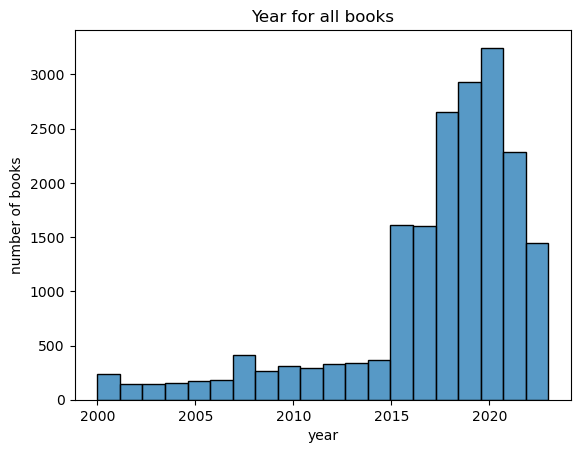

In [30]:
histogram(very_recent, 'year')

It now becomes clear that most of our books are from around 2020, with a great majority within about 4 years of 2019. 

In [31]:
post2015 = np.sum(df['year'] >= 2015)

In [32]:
print(f"In fact, {post2015} books, or {round(post2015/len(df)*100, 1)}% of our data, are from 2015 or later.")

In fact, 15765 books, or 71.6% of our data, are from 2015 or later.


The "title" and "author" columns will not be used in the algorithm, and were only relevant for the purposes of collecting and categorizing the data. However, it might be interesting to see which authors appeared the most frequently.

In [33]:
authors = df['author'].value_counts()

In [34]:
authors[:20]

author
Franklin W. Dixon      146
Carolyn Keene           83
Debbie Macomber         80
Stephen King            71
Danielle Steel          68
Dean Koontz             63
Nora Roberts            58
Piers Anthony           46
John Sandford           39
John Grisham            39
Lorelei James           38
R. L. Stine             38
Sandra Brown            38
Sherrilyn Kenyon        37
William Shakespeare     36
Tom Clancy              34
Ruth Rendell            34
Agatha Christie         33
Jeffrey Archer          32
David Gemmell           32
Name: count, dtype: int64

It looks like the top 20 authors have more than 30 books on this list, with Franklin W. Dixon, the author of The Hardy Boys, having an incredible 146! That could be very relevant and potentially skew the data.

In [35]:
print(f"The average author is represented only {round(authors.mean(),2)} times in the dataset.")

The average author is represented only 1.79 times in the dataset.


In [36]:
df[df['author'] == 'Franklin W. Dixon'].head(10)

,title,author,total words,vividness,passive voice,all adverbs,ly-adverbs,non-ly-adverbs,genre,year
10,The Hardy Boys: The Demon's Den,Franklin W. Dixon,33745.0,48.64,7.80,3.04,1.09,1.95,"['Mystery', 'Fiction', 'Childrens', 'Young Adu...",1984.0
49,The Hardy Boys: Danger On Vampire Trail,Franklin W. Dixon,32114.0,58.99,6.84,2.66,0.99,1.67,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1971.0
153,The Hardy Boys: Day of the Dinosaur,Franklin W. Dixon,31057.0,45.64,7.31,3.23,1.45,1.78,"['Mystery', 'Childrens', 'Classics']",1994.0
193,The Hardy Boys: The Melted Coins,Franklin W. Dixon,33711.0,46.57,7.22,2.89,1.09,1.79,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1944.0
252,The Hardy Boys: The Tower Treasure,Franklin W. Dixon,35293.0,40.38,8.30,3.11,1.24,1.88,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1927.0
540,The Hardy Boys: Wreck and Roll,Franklin W. Dixon,30532.0,53.35,6.53,2.32,0.90,1.42,"['Mystery', 'Fiction', 'Detective']",2004.0
571,The Hardy Boys: The Wailing Siren Mystery,Franklin W. Dixon,32780.0,51.22,7.44,2.72,1.12,1.60,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1951.0
593,The Hardy Boys: The Mystery of the Spiral B,Franklin W. Dixon,32201.0,52.72,6.24,3.15,1.48,1.67,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1965.0
652,The Hardy Boys: The Hunt For Four Brothers,Franklin W. Dixon,29095.0,62.07,6.27,1.80,0.62,1.18,"['Mystery', 'Childrens', 'Fiction', 'Classics']",1999.0
663,The Hardy Boys: The Great Airport Mystery,Franklin W. Dixon,32733.0,47.39,6.78,3.06,1.38,1.68,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1930.0


A quick glance reveals that, as one might expect, the genres on these books are all roughly the same. Some of the linguistic features range a bit more than you'd think, and the range on the years is enough to make one suspicious. Indeed, a bit of research indicates that the series is largely ghostwritten under the same pen name. 

In [37]:
df[df['author'] == 'Carolyn Keene'].head(10)

,title,author,total words,vividness,passive voice,all adverbs,ly-adverbs,non-ly-adverbs,genre,year
184,Nancy Drew: The Witch Tree Symbol,Carolyn Keene,34096.0,42.75,8.07,3.10,1.19,1.90,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1955.0
230,Nancy Drew: The Whispering Statue,Carolyn Keene,34042.0,39.16,8.43,2.90,1.10,1.80,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1937.0
1333,Nancy Drew: Trouble In Tahiti,Carolyn Keene,29789.0,61.35,6.66,2.93,1.25,1.68,"['Mystery', 'Young Adult', 'Childrens', 'Ficti...",1987.0
1671,Nancy Drew: The Clue of the Whistling Bagpipes,Carolyn Keene,34986.0,46.19,7.99,3.14,1.25,1.89,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1964.0
1803,Nancy Drew: Last Dance,Carolyn Keene,28693.0,40.23,8.40,2.90,1.26,1.64,"['Mystery', 'Young Adult', 'Childrens', 'Middl...",1989.0
2542,Nancy Drew: The Clue in the Diary,Carolyn Keene,32355.0,35.10,8.88,3.61,1.70,1.91,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1932.0
2941,Nancy Drew: Sisters In Crime,Carolyn Keene,29187.0,37.02,8.05,3.35,1.21,2.14,"['Mystery', 'Young Adult', 'Fiction', 'Childre...",1988.0
3115,Nancy Drew: Wings of Fear,Carolyn Keene,27832.0,37.65,8.69,3.44,1.47,1.97,"['Mystery', 'Young Adult', 'Fiction', 'Childre...",1987.0
3134,Nancy Drew: The Double Jinx Mystery,Carolyn Keene,34744.0,40.54,8.41,3.21,1.20,2.00,"['Mystery', 'Fiction', 'Young Adult', 'Childre...",1973.0
3280,Nancy Drew: Betrayed By Love,Carolyn Keene,28666.0,39.98,9.06,3.73,1.35,2.37,"['Mystery', 'Young Adult', 'Childrens', 'Ficti...",1996.0


It looks like the second most frequent author, Carolyn Keene, has a very similar situation! The name belongs to another series of ghostwriters writing the Nancy Drew series, yet another long-running series of children's mystery fiction. 

In [38]:
print(f"Together, these two children's mystery series account for \
{round((authors['Franklin W. Dixon']+authors['Carolyn Keene'])/len(df)*100,1)}% of our books!")

Together, these two children's mystery series account for 1.0% of our books!


That seems like it could really skew our algorithm. 

In [39]:
df[df['author'] == 'Debbie Macomber'].head()

,title,author,total words,vividness,passive voice,all adverbs,ly-adverbs,non-ly-adverbs,genre,year
56,A Mrs. Miracle Christmas,Debbie Macomber,46408.0,38.01,9.49,3.03,1.16,1.86,"['Christmas', 'Fiction', 'Romance', 'Holiday',...",2019.0
268,Thursdays at Eight,Debbie Macomber,88264.0,29.95,10.03,3.44,1.34,2.10,"['Romance', 'Fiction', 'Chick Lit', 'Adult', '...",2001.0
597,Navy Woman,Debbie Macomber,61281.0,35.70,9.75,3.75,1.57,2.18,"['Romance', 'Fiction', 'Military Fiction', 'Co...",1991.0
1214,Ready for Romance,Debbie Macomber,43846.0,34.08,9.72,3.43,1.36,2.07,"['Romance', 'Fiction', 'Contemporary Romance',...",1999.0
1848,Alaskan Holiday,Debbie Macomber,47321.0,36.32,9.96,2.77,0.96,1.81,"['Romance', 'Christmas', 'Fiction', 'Holiday',...",2018.0


Debbie Macomber, at least, is an actual author, rather than a collective of authors writing over a timespan of more than a century. The other authors with more than 40 books appear to be individual people, too.